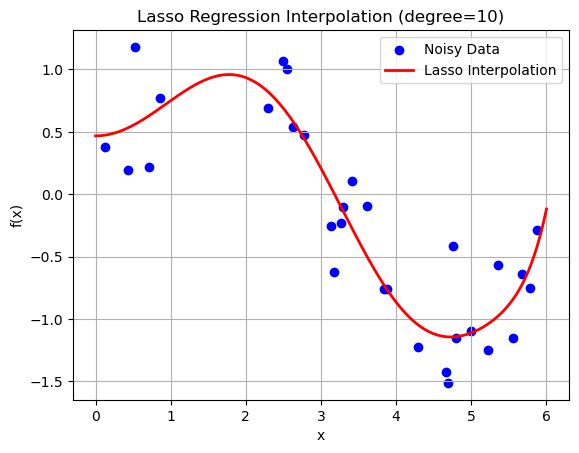

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import warnings
warnings.filterwarnings("ignore")

# Generate sample data (noisy sine wave)
np.random.seed(0)

input_data = np.sort(np.random.rand(30) * 6)  # 30 points between 0 and 6
output_data = np.sin(input_data) + 0.3 * np.random.randn(30)  # sine wave with noise

# Create fine grid for interpolation (dense X values)
input_data_interp = np.linspace(0, 6, 300).reshape(-1, 1)

# Use Polynomial features + Lasso for interpolation
degree = 10  # High-degree polynomial to allow flexibility

lasso_model = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=0.01, max_iter=1000000))
lasso_model.fit(input_data.reshape(-1, 1), output_data)

# Predict (interpolate)
output_data_interp = lasso_model.predict(input_data_interp)

# Plot original points and interpolation
plt.scatter(input_data, output_data, color='blue', label='Noisy Data')
plt.plot(input_data_interp, output_data_interp, color='red', linewidth=2, label='Lasso Interpolation')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(f"Lasso Regression Interpolation (degree={degree})")
plt.legend()
plt.grid(True)
plt.show()